# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset.

In this section, you should:

- [X] Inspect the shapes of the training and test sets to confirm their size and structure.
- [X] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [X] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
import numpy as np
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
from keras.models import Sequential
from keras.layers import Dense, Flatten
import keras
from keras import layers, models
import matplotlib.pyplot as plt

Num GPUs Available: 1


In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, _y_train), (X_test, _y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [3]:
# Inspect the shapes of the datasets
print('Shapes of X_train:{}, X_test:{}'.format(X_train.shape, X_test.shape))

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

# # transform y
classes = len(class_names)
y_train = to_categorical(_y_train.flatten(), num_classes=classes)
y_test = to_categorical(_y_test.flatten(), num_classes=classes)


Shapes of X_train:(60000, 28, 28), X_test:(10000, 28, 28)


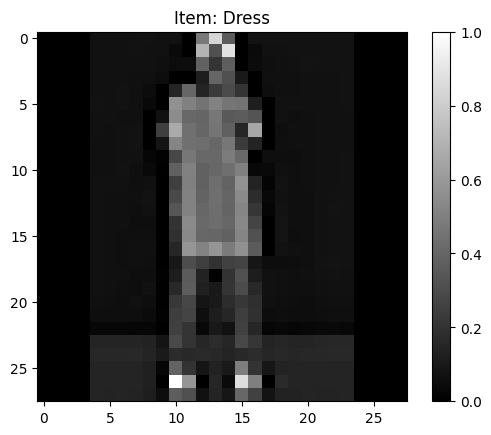

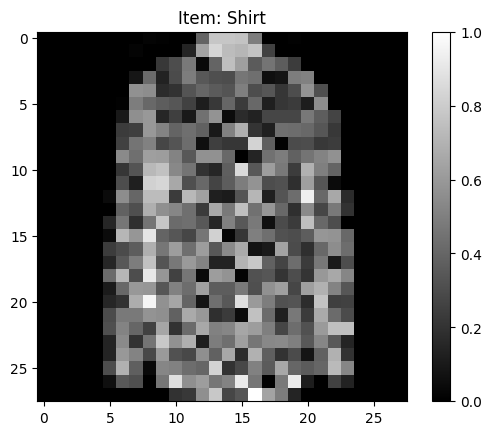

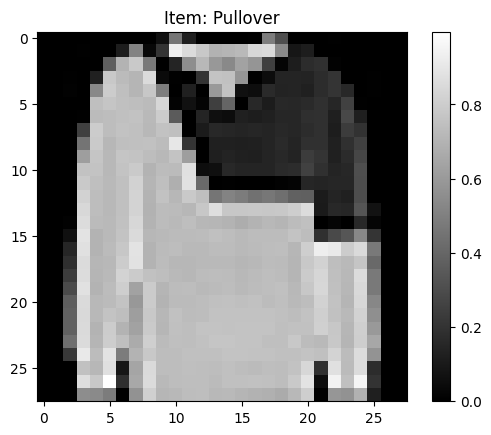

In [4]:
def plot_image(
    x: np.array,
    y: np.array,
    labels: np.array,
    idx: int = 0
    ):
    """Plot image
    """
    image_idx = idx
    plt.imshow(data[idx], cmap='gray')
    plt.colorbar()
    plt.title("Item: {}".format(labels[y[idx]]))
    plt.show()

data = X_train
labels = np.array(class_names)
for i in np.random.randint(0, data.shape[0], 3):
    plot_image(data, _y_train, labels, i)


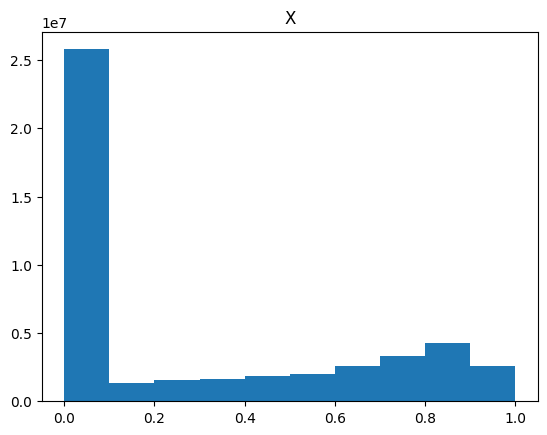

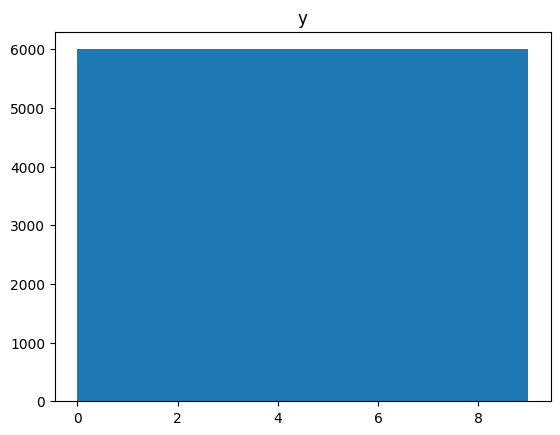

In [5]:
def plot_hist(
    array: np.array,
    title: str
    ):
    """Plot histogram for a given array
    """
    fig, ax = plt.subplots()
    ax.hist(array)
    plt.title(title)
    plt.show()

plot_hist(X_train.flatten(), 'X')
plot_hist(_y_train.flatten(), 'y')

## **Reflection**

### 1. Does the data look as expected? How is the quality of the images?

> - Yes. The images are in black and white (or just one channel) as X is given in dimensions `(n, n, 1)`.

### 2. Are there any issues with the dataset that you notice?
> - The resolution is low and the absence of color (a second and third channel)could translate into a lack of information such that the model might not be able to differentiate between similar objects such as `"T-shirt/top"` and `"Shirt"`

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [X] Create a simple linear regression model using Keras.
- [X] Compile the model with an appropriate loss function and optimizer.
- [X] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [28]:
# from keras.models import Sequential
# from keras.layers import Dense, Flatten
# import keras
# from keras import layers, models

# Create a simple linear regression model
# model = Sequential()
# You can use `model.add(<layer>)` to add layers to the model
# Compile the model using `model.compile()`
# Train the model with `model.fit()`
# Evaluate the model with `model.evaluate()`
lr = 1e-2
model = models.Sequential()
model.add(
    layers.Flatten(input_shape=(28, 28)))
model.add(
    layers.Dense(56, activation='relu'))
model.add(
    layers.Dense(112, activation='relu'))
model.add(
    layers.Dense(len(class_names), activation='softmax'))

model.summary()

opt = keras.optimizers.Adam(learning_rate=lr)

model.compile(
    optimizer=opt,
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', keras.metrics.F1Score, keras.metrics.AUC]
    )

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
    )



Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 56)             │        43,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 112)            │         6,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 10)             │         1,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,474 (201.07 KB)

 Trainable params: 51,474 (201.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7477 - auc_15: 0.9680 - f1_score: 0.7439 - loss: 0.6959 - val_accuracy: 0.8303 - val_auc_15: 0.9854 - val_f1_score: 0.8248 - val_loss: 0.4769
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8244 - auc_15: 0.9849 - f1_score: 0.8229 - loss: 0.4865 - val_accuracy: 0.8407 - val_auc_15: 0.9849 - val_f1_score: 0.8373 - val_loss: 0.4692
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8414 - auc_15: 0.9875 - f1_score: 0.8388 - loss: 0.4400 - val_accuracy: 0.8503 - val_auc_15: 0.9875 - val_f1_score: 0.8460 - val_loss: 0.4271
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8508 - auc_15: 0.9880 - f1_score: 0.8486 - loss: 0.4235 - val_accuracy: 0.8366 - val_auc_15: 0.9865 - val_f1_score: 0.8381 - val_loss: 0.4532
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8536 - auc_15: 0.9889 - f1_score: 0.8511 - loss: 0.4068 - val_accuracy: 0.8498 - val_auc_15

In [33]:
test_loss, test_acc, test_f1, test_auc = model.evaluate(X_test,  y_test)
print('test_loss: {:.3f}, test_acc: {:.3f}, test_f1: {:.3f}, test_auc: {:.3f}'.format(
    test_loss, test_acc, np.mean(np.array(test_f1)), test_auc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8450 - auc_15: 0.9847 - f1_score: 0.8454 - loss: 0.4777
test_loss: 0.496, test_acc: 0.841, test_f1: 0.840, test_auc: 0.984


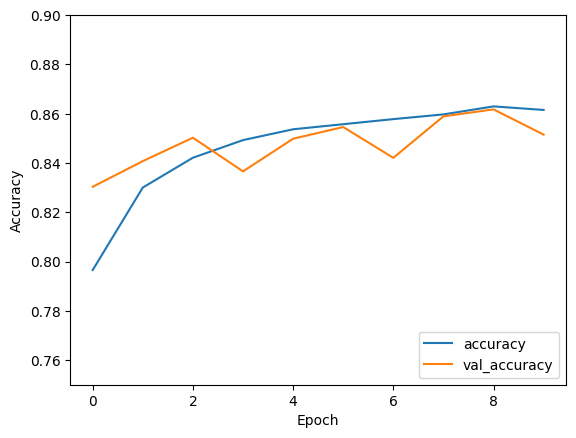

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.75, 0.9])
plt.legend(loc='lower right')


Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

# **Answer:**
> - On test set: accuracy: `test_loss: 0.496, test_acc: 0.841, test_f1: 0.840, test_auc: 0.984`
>
> - It performs better than I expected considering that no hyperparameter tunning was performed. Also, it's a reasonable good perfomance (high accuracy, f1 score, and AUC) given that only Dense and not Conv2D layers were used
>
> - However, from the learning curve it is possible to say that the learning is not happening smoothly and that the model is slightly overfitting.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [X] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [X] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [X] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [ ]:
from keras.layers import Conv2D

In [4]:
# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()

# Define params for baseline
# Pooling
pooling_params = {
    'pool_size': (2, 2),
    'strides': (1, 1)
    }

# Conv2D nodes:
conv2_filters = {
    1: 56,
    2: 112,
    3: 2224
    }
dense_nodes ={
    1: 56,
    2: 112,
    3: 224
}
# learning rate
lr = 1e-3

model = models.Sequential()
# 3 CNN w/default hyperparams
# 1
model.add(
    layers.Conv2D(
        conv2_filters[1],
        (2, 2),
        activation='relu',
        input_shape=(28, 28, 1)
        )
    )
model.add(
    layers.MaxPooling2D(**pooling_params)
    )
# 2
model.add(
    layers.Conv2D(
        conv2_filters[2],
        (2, 2),
        activation='relu'
        ))
model.add(
    layers.MaxPooling2D(**pooling_params)
    )
# 3
model.add(
    layers.Conv2D(
        conv2_filters[3],
        (2, 2),
        activation='relu',
        ))

# flatten layer
model.add(
    layers.Flatten())

# 3 Dense layers w/default hyperparams
# 1
model.add(
    layers.Dense(
        dense_nodes[1],
        activation='relu'
        ))
# 2
model.add(
    layers.Dense(
        dense_nodes[2],
        activation='relu'
        ))

# 3
model.add(
    layers.Dense(
        dense_nodes[3],
        activation='relu'
        ))

# output
model.add(
    layers.Dense(len(class_names), activation='softmax')
    )

model.summary()

opt = keras.optimizers.Adam(learning_rate=lr)

model.compile(
    optimizer=opt,
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', keras.metrics.F1Score, keras.metrics.AUC]
    )

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
    )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 27, 27, 56)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 56)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 25, 25, 112)    │        25,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 112)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 23, 23, 2224)   │       998,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1176496)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 56)             │    65,883,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 112)            │         6,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 224)            │        25,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,941,834 (255.36 MB)

 Trainable params: 66,941,834 (255.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 99s 60ms/step - accuracy: 0.7809 - auc: 0.9711 - f1_score: 0.7781 - loss: 0.6236 - val_accuracy: 0.8864 - val_auc: 0.9940 - val_f1_score: 0.8848 - val_loss: 0.3084
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 134s 59ms/step - accuracy: 0.9001 - auc: 0.9946 - f1_score: 0.8996 - loss: 0.2743 - val_accuracy: 0.8965 - val_auc: 0.9936 - val_f1_score: 0.8951 - val_loss: 0.2915
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 141s 58ms/step - accuracy: 0.9151 - auc: 0.9961 - f1_score: 0.9152 - loss: 0.2253 - val_accuracy: 0.9028 - val_auc: 0.9944 - val_f1_score: 0.9019 - val_loss: 0.2673
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 87s 58ms/step - accuracy: 0.9351 - auc: 0.9973 - f1_score: 0.9344 - loss: 0.1805 - val_accuracy: 0.9072 - val_auc: 0.9948 - val_f1_score: 0.9078 - val_loss: 0.2583
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 142s 58ms/step - accuracy: 0.9431 - auc: 0.9980 - f1_score: 0.9432 - loss: 0.1536 - val_accuracy: 0.9181 - val_auc: 0.9937 - val_f1_

In [5]:
test_loss, test_acc, test_f1, test_auc = model.evaluate(X_test,  y_test)
print('test_loss: {:.3f}, test_acc: {:.3f}, test_f1: {:.3f}, test_auc: {:.3f}'.format(
    test_loss, test_acc, np.mean(np.array(test_f1)), test_auc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9081 - auc: 0.9825 - f1_score: 0.9084 - loss: 0.4733
test_loss: 0.478, test_acc: 0.909, test_f1: 0.909, test_auc: 0.982


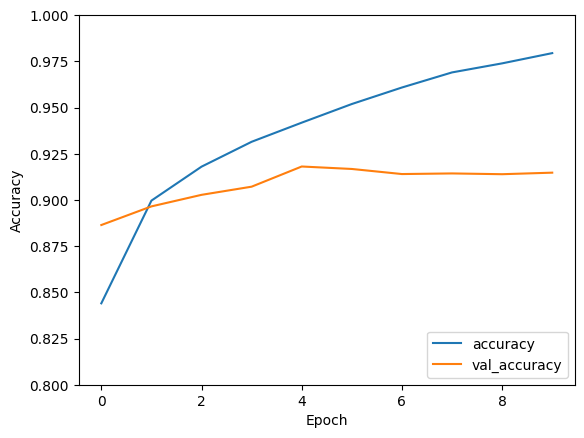

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.legend(loc='lower right')


Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

## **Answer**
> - Previous:
>   - test_loss: 0.496, test_acc: 0.841, test_f1: 0.840, test_auc: 0.984
> - CNN:
>   - test_loss: 0.478, test_acc: 0.909, test_f1: 0.909, test_auc: 0.982
>
> - Overall, the resulting accuracy, f1 score and AUC are higher than the Dense layer-based model, however, as the learning curve shows, the CNN model is **overfitting** noticeably.
>
> - The the addition of Conv2D layers, which help to learn more information from the pictures as 2D objects (grids), might be reason behind such overfitting.


# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [X] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [X] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [X] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [X] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [10]:
# A. Test Hyperparameters

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

def create_model(
      lr: float = 1e-2,
      kernels = (2, 2),
      conv2_filter_1= 56,
      conv2_filter_2= 112,
      conv2_filter_3= 2224,
      dense_nodes_1= 56,
      dense_nodes_2= 112,
      dense_nodes_3= 224,
      initializer_scheme=keras.initializers.GlorotUniform()
      ):

    model = models.Sequential()
    # 3 CNN
    # 1
    model.add(
        layers.Conv2D(
            conv2_filter_1,
            kernels,
            activation='relu',
            input_shape=(28, 28, 1),
            kernel_initializer=initializer_scheme
            )
        )
    model.add(
        layers.MaxPooling2D(
            pool_size= (2, 2),
            strides= (1, 1)
            )
        )
    # 2
    model.add(
        layers.Conv2D(
            conv2_filter_2,
            kernels,
            activation='relu',
            kernel_initializer=initializer_scheme
            ))
    model.add(
        layers.MaxPooling2D(
            pool_size= (2, 2),
            strides= (1, 1)
        )
        )
    # 3
    model.add(
        layers.Conv2D(
            conv2_filter_3,
            kernels,
            activation='relu',
            kernel_initializer=initializer_scheme
            ))

    # flattening layer
    model.add(
        layers.Flatten())

    # 3 Dense layers
    # 1
    model.add(
        layers.Dense(
            dense_nodes_1,
            activation='relu',
            kernel_initializer=initializer_scheme
            ))
    # 2
    model.add(
        layers.Dense(
            dense_nodes_2,
            activation='relu',
            kernel_initializer=initializer_scheme
            ))

    # 3
    model.add(
        layers.Dense(
            dense_nodes_3,
            activation='relu',
            kernel_initializer=initializer_scheme
            ))

    # output
    model.add(
        layers.Dense(len(class_names), activation='softmax')
        )

    # model.summary()

    opt = keras.optimizers.Adam(learning_rate=lr)

    model.compile(
        optimizer=opt,
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
        metrics=['accuracy', keras.metrics.F1Score, keras.metrics.AUC]
        )
    return model

def train_model(
    model,
    X_train,
    y_train
    ):
    # model = create_model()
    return model.fit(
        X_train,
        y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.2
        )

def validate_model(model, X_test, y_test):
        test_loss, test_acc, test_f1, test_auc = model.evaluate(X_test,  y_test)
        return test_loss, test_acc, test_f1, test_auc

In [11]:
# Tunning
# learning rate
lrs = [0.1, 1e-2, 1e-3]

for lr_i in lrs:
    model = create_model(lr=lr_i)
    trained_model = train_model(model, X_train, y_train)
    test_loss, test_acc, test_f1, test_auc = validate_model(trained_model, X_test, y_test)
    print('test_loss: {:.3f}, test_acc: {:.3f}, test_f1: {:.3f}, test_auc: {:.3f}'.format(
        test_loss, test_acc, np.mean(np.array(test_f1)), test_auc
        )
    )


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 134s 59ms/step - accuracy: 0.1021 - auc_1: 0.5014 - f1_score: 0.0932 - loss: 29340.1211 - val_accuracy: 0.0983 - val_auc_1: 0.5006 - val_f1_score: 0.0179 - val_loss: 2.3114
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 136s 59ms/step - accuracy: 0.1009 - auc_1: 0.4993 - f1_score: 0.0939 - loss: 2.3167 - val_accuracy: 0.1013 - val_auc_1: 0.4995 - val_f1_score: 0.0184 - val_loss: 2.3151
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 88s 59ms/step - accuracy: 0.0987 - auc_1: 0.4983 - f1_score: 0.0943 - loss: 2.3153 - val_accuracy: 0.1003 - val_auc_1: 0.5005 - val_f1_score: 0.0182 - val_loss: 2.3203
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 140s 58ms/step - accuracy: 0.0960 - auc_1: 0.4978 - f1_score: 0.0915 - loss: 2.3150 - val_accuracy: 0.1005 - val_auc_1: 0.4981 - val_f1_score: 0.0183 - val_loss: 2.3274
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 142s 58ms/step - accuracy: 0.0996 - auc_1: 0.4969 - f1_score: 0.0934 - loss: 2.3165 - val_accuracy: 0.1013 - va

In [13]:
# checking initializers

lr_i = 1e-3  # From previous training
initializers = [
    keras.initializers.HeNormal(seed=None),
    keras.initializers.TruncatedNormal(mean=0., stddev=1.)
    ]

for initializer_i in initializers:
    model = create_model(initializer_scheme=initializer_i, lr=lr_i)
    trained_model = train_model(model, X_train, y_train)
    test_loss, test_acc, test_f1, test_auc = validate_model(trained_model, X_test, y_test)
    print('test_loss: {:.3f}, test_acc: {:.3f}, test_f1: {:.3f}, test_auc: {:.3f}'.format(
        test_loss, test_acc, np.mean(np.array(test_f1)), test_auc
        )
    )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.7798 - auc_4: 0.9545 - f1_score: 0.7772 - loss: 5.8737 - val_accuracy: 0.8858 - val_auc_4: 0.9928 - val_f1_score: 0.8862 - val_loss: 0.3213
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 135s 59ms/step - accuracy: 0.8958 - auc_4: 0.9935 - f1_score: 0.8952 - loss: 0.2951 - val_accuracy: 0.8894 - val_auc_4: 0.9936 - val_f1_score: 0.8875 - val_loss: 0.3043
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 141s 59ms/step - accuracy: 0.9102 - auc_4: 0.9952 - f1_score: 0.9106 - loss: 0.2471 - val_accuracy: 0.8946 - val_auc_4: 0.9937 - val_f1_score: 0.8892 - val_loss: 0.2956
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 90s 60ms/step - accuracy: 0.9236 - auc_4: 0.9965 - f1_score: 0.9238 - loss: 0.2074 - val_accuracy: 0.9048 - val_auc_4: 0.9928 - val_f1_score: 0.9033 - val_loss: 0.2907
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 141s 59ms/step - accuracy: 0.9315 - auc_4: 0.9972 - f1_score: 0.9316 - loss: 0.1815 - val_accuracy: 0.9013 - val_auc

In [14]:
# B. Test presence or absence of regularization

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

def create_model(
      lr: float = 1e-2,
      kernels = (2, 2),
      conv2_filter_1= 56,
      conv2_filter_2= 112,
      conv2_filter_3= 2224,
      dense_nodes_1= 56,
      dense_nodes_2= 112,
      dense_nodes_3= 224,
      initializer_scheme=keras.initializers.GlorotUniform(),
      dropout_rate = 0.
      ):

    model = models.Sequential()
    # 3 CNN
    # 1
    model.add(
        layers.Conv2D(
            conv2_filter_1,
            kernels,
            activation='relu',
            input_shape=(28, 28, 1),
            kernel_initializer=initializer_scheme
            )
        )
    model.add(
        layers.MaxPooling2D(
            pool_size= (2, 2),
            strides= (1, 1)
            )
        )
    model.add(layers.SpatialDropout2D(dropout_rate))
    # 2
    model.add(
        layers.Conv2D(
            conv2_filter_2,
            kernels,
            activation='relu',
            kernel_initializer=initializer_scheme
            ))
    model.add(
        layers.MaxPooling2D(
            pool_size= (2, 2),
            strides= (1, 1)
        )
        )
    model.add(layers.SpatialDropout2D(dropout_rate))
    # 3
    model.add(
        layers.Conv2D(
            conv2_filter_3,
            kernels,
            activation='relu',
            kernel_initializer=initializer_scheme
            ))

    # flattening layer
    model.add(
        layers.Flatten())

    # 3 Dense layers
    # 1
    model.add(
    layers.BatchNormalization()
    )
    model.add(
        layers.Dense(
            dense_nodes_1,
            activation='relu',
            kernel_initializer=initializer_scheme
            ))
    model.add(layers.Dropout(rate=dropout_rate))
    # 2
    model.add(
    layers.BatchNormalization()
    )
    model.add(
        layers.Dense(
            dense_nodes_2,
            activation='relu',
            kernel_initializer=initializer_scheme
            ))
    model.add(layers.Dropout(rate=dropout_rate))
    # 3
    model.add(
    layers.BatchNormalization()
    )
    model.add(
        layers.Dense(
            dense_nodes_3,
            activation='relu',
            kernel_initializer=initializer_scheme
            ))
    model.add(layers.Dropout(rate=dropout_rate))
    # output
    model.add(
        layers.Dense(len(class_names), activation='softmax')
        )

    # model.summary()

    opt = keras.optimizers.Adam(learning_rate=lr)

    model.compile(
        optimizer=opt,
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
        metrics=['accuracy', keras.metrics.F1Score, keras.metrics.AUC]
        )
    return model

def train_model(
    model,
    X_train,
    y_train
    ):
    # model = create_model()
    return model.fit(
        X_train,
        y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.2
        )

def validate_model(model, X_test, y_test):
        test_loss, test_acc, test_f1, test_auc = model.evaluate(X_test,  y_test)
        return test_loss, test_acc, test_f1, test_auc


> absence of regularization has been tested in `A`

In [15]:
# test batchnormalization
lr_i = 1e-3
initializer_i = keras.initializers.GlorotUniform()
dropout_i = 0.0

model = create_model(
        lr=lr_i, initializer_scheme=initializer_i, dropout_rate=dropout_i
        )
trained_model = train_model(model, X_train, y_train)
test_loss, test_acc, test_f1, test_auc = validate_model(trained_model.model, X_test, y_test)
print('test_loss: {:.3f}, test_acc: {:.3f}, test_f1: {:.3f}, test_auc: {:.3f}'.format(
    test_loss, test_acc, np.mean(np.array(test_f1)), test_auc
    )
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.8018 - auc_6: 0.9794 - f1_score: 0.8005 - loss: 0.5448 - val_accuracy: 0.8895 - val_auc_6: 0.9938 - val_f1_score: 0.8907 - val_loss: 0.2966
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 117s 78ms/step - accuracy: 0.8893 - auc_6: 0.9937 - f1_score: 0.8892 - loss: 0.3009 - val_accuracy: 0.9045 - val_auc_6: 0.9954 - val_f1_score: 0.9057 - val_loss: 0.2529
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 143s 79ms/step - accuracy: 0.9097 - auc_6: 0.9954 - f1_score: 0.9091 - loss: 0.2456 - val_accuracy: 0.9052 - val_auc_6: 0.9943 - val_f1_score: 0.9032 - val_loss: 0.2647
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 136s 75ms/step - accuracy: 0.9220 - auc_6: 0.9966 - f1_score: 0.9221 - loss: 0.2111 - val_accuracy: 0.9086 - val_auc_6: 0.9952 - val_f1_score: 0.9092 - val_loss: 0.2455
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 112s 75ms/step - accuracy: 0.9301 - auc_6: 0.9970 - f1_score: 0.9300 - loss: 0.1898 - val_accuracy: 0.9183 - val_a

In [19]:
# test dropout
lr_i = 1e-3
initializer_i = keras.initializers.GlorotUniform()
dropouts = [0.1, 0.2, 0.5]

for dropout_i in dropouts:
    model = create_model(
        lr=lr_i, initializer_scheme=initializer_i, dropout_rate=dropout_i
        )
    trained_model = train_model(model, X_train, y_train)
    test_loss, test_acc, test_f1, test_auc = validate_model(trained_model.model, X_test, y_test)
    print('test_loss: {:.3f}, test_acc: {:.3f}, test_f1: {:.3f}, test_auc: {:.3f}'.format(
        test_loss, test_acc, np.mean(np.array(test_f1)), test_auc
        )
    )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 126s 79ms/step - accuracy: 0.7387 - auc_10: 0.9674 - f1_score: 0.7341 - loss: 0.7025 - val_accuracy: 0.8727 - val_auc_10: 0.9923 - val_f1_score: 0.8737 - val_loss: 0.3321
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 140s 80ms/step - accuracy: 0.8680 - auc_10: 0.9907 - f1_score: 0.8678 - loss: 0.3748 - val_accuracy: 0.8969 - val_auc_10: 0.9943 - val_f1_score: 0.8959 - val_loss: 0.2844
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 138s 77ms/step - accuracy: 0.8834 - auc_10: 0.9927 - f1_score: 0.8823 - loss: 0.3200 - val_accuracy: 0.9007 - val_auc_10: 0.9938 - val_f1_score: 0.8994 - val_loss: 0.2750
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 141s 77ms/step - accuracy: 0.8982 - auc_10: 0.9944 - f1_score: 0.8972 - loss: 0.2790 - val_accuracy: 0.9144 - val_auc_10: 0.9954 - val_f1_score: 0.9150 - val_loss: 0.2422
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 146s 79ms/step - accuracy: 0.9086 - auc_10: 0.9952 - f1_score: 0.9078 - loss: 0.2525 - val_accuracy: 0.907

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

## **Answer**
> - Yes, the learning rate, batchnorm and dropout.
> - Altogether, a good performance was achieved at the time overfitting was reduced in comparison with the baseline
> It has to be noted that the approach followed here for the selection of hyperparameters was in a sense naive, i.e., the parameters were optimized separately which neglects any "collaborative" effects between differenet hyperparameters

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [X] Compile the final model with the best hyperparameters and regularization techniques.
- [X] Train the final model on the training set and evaluate it on the test set.
- [X] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [20]:
lr_i = 1e-3
initializer_i = keras.initializers.GlorotUniform()
dropout_i = 0.2

model = create_model(
    lr=lr_i, initializer_scheme=initializer_i, dropout_rate=dropout_i
    )
trained_model = train_model(model, X_train, y_train)
test_loss, test_acc, test_f1, test_auc = validate_model(trained_model.model, X_test, y_test)
print('test_loss: {:.3f}, test_acc: {:.3f}, test_f1: {:.3f}, test_auc: {:.3f}'.format(
    test_loss, test_acc, np.mean(np.array(test_f1)), test_auc
    )
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 130s 80ms/step - accuracy: 0.6890 - auc_13: 0.9536 - f1_score: 0.6835 - loss: 0.8370 - val_accuracy: 0.8595 - val_auc_13: 0.9905 - val_f1_score: 0.8541 - val_loss: 0.3797
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 120s 80ms/step - accuracy: 0.8470 - auc_13: 0.9876 - f1_score: 0.8456 - loss: 0.4348 - val_accuracy: 0.8879 - val_auc_13: 0.9935 - val_f1_score: 0.8853 - val_loss: 0.2993
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 137s 77ms/step - accuracy: 0.8678 - auc_13: 0.9904 - f1_score: 0.8675 - loss: 0.3724 - val_accuracy: 0.8898 - val_auc_13: 0.9938 - val_f1_score: 0.8853 - val_loss: 0.3017
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 145s 79ms/step - accuracy: 0.8816 - auc_13: 0.9923 - f1_score: 0.8800 - loss: 0.3299 - val_accuracy: 0.9115 - val_auc_13: 0.9956 - val_f1_score: 0.9104 - val_loss: 0.2478
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 142s 79ms/step - accuracy: 0.8914 - auc_13: 0.9935 - f1_score: 0.8909 - loss: 0.3041 - val_accuracy: 0.911

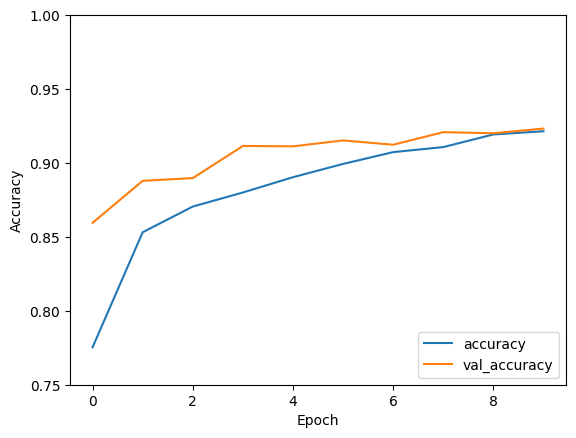

In [22]:
plt.plot(trained_model.history['accuracy'], label='accuracy')
plt.plot(trained_model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.75, 1.0])
plt.legend(loc='lower right')

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

## **Answer**
> - The accuracy, f1 score, and AUC don't improve as much (>0.5 units), however, the model tends to overfit less.
>
> - The above is most likely the result of including `Dropout` layers for both the Conv2D and Dense layers sections
>
> - Using `keras tuner` I would run a hyperparameter optimization to account for combined effects of hyperparameters, i.e., not optimizing the learning rate separately from the optimization of the dropout rate.
>
> - I would also optimize the number of filters and nodes in the Conv2D and Dense layers repsectively.
>
> - In addition, I would like to try other tools to evaluate the performance of the model, for example, confusion matrices:

```python
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

y_pred_probs = trained_model.model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(_y_test, y_pred)

df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
```
I couldn't try the above because my runtime restarted before I could run that cell.

# **Model results on test set**

| param    | value                            | loss | acc | f1  | auc | best|
|----------|----------------------------------|------|-----|-----|-----|-----|
|Only Dense| 2 hidden layers                  |0.496 |0.841|0.840|0.984|
|Baseline  |                                  |0.478 |0.909|0.909|0.982|     |
| lr       | 0.1                              |2.312 |0.100|0.018|0.500|     |
|          | 1e-2                             |0.377 |0.869|0.868|0.990|     |
|          | 1e-3                             |0.439 |0.917|0.917|0.982|  *  |
| init     | GlorotUniform                    |0.439 |0.917|0.917|0.982|  *  |
|          | HeNormal                         |0.451 |0.903|0.905|0.982|     |
|          | TruncatedNormal(mean=0, std=1.0) |2.770 |0.107|0.031|0.507|     |
| Bnorm    | (Included)                       |0.352 |0.900|0.899|0.989|     |
|Dropout   | 0.1                              |0.245 |0.913|0.913|0.995|     |
|          | 0.2                              |0.237 |0.920|0.919|0.995|  *  |
|          | 0.5                              |0.370 |0.875|0.875|0.992|     |
|**FINAL** | lr=1e-3                          |0.228 |0.919|0.918|0.995|     |
|          | init=GlorotUniform               |      |     |     |     |     |
|          | Bnorm=True                       |      |     |     |     |     |
|          | Dropout=0.2                      |      |     |     |     |     |

> **Notes**:
> - lr = learning rate
> - init = initialization scheme
> - Bnorm = Batchnormalization

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [X] Created a branch with the correct naming convention.
- [X] Ensured that the repository is public.
- [X] Reviewed the PR description guidelines and adhered to them.
- [X] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.